In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import function as func

# Original
'''
outdatadir='./output/result_data/'
outdir='./output/result_figure/yfactor'
doRebin = False # Old rebinning (averaging) after dat_to_array
'''

# New rebin check
'''
outdatadir='./output/result_data_newrebin/'
outdir='./output/result_figure_newrebin/yfactor'
doRebin = True # Rebinning in dat_to_array
'''

# New rebin check: method=1
outdatadir='./output/result_data_newrebin1/'
#outdir='./output/result_figure_newrebin1/yfactor'
# with new data in the output
outdir='./output/result_figure_newrebin1/yfactor2'
doRebin = True # Rebinning in dat_to_array
rebinmethod = 1

if not os.path.isdir(outdatadir):
    os.makedirs(outdatadir)
    pass
if not os.path.isdir(outdir):
    os.makedirs(outdir)
    pass

''' 
# original data columns
column = [
        "freq", 
        "Gain", "Trx", "Gain_err", "Trx_err", 
        "Gain_ini", "Trx_ini", "Gain_ini_err", "Trx_ini_err", 
        "Gain_fin", "Trx_fin", "Gain_fin_err", "Trx_fin_err"
        ]
#'''

# new data columns for power spectrum
column = [
        "freq", 
        "Gain", "Trx", "Gain_err", "Trx_err", 
        "Gain_ini", "Trx_ini", "Gain_ini_err", "Trx_ini_err", 
        "Gain_fin", "Trx_fin", "Gain_fin_err", "Trx_fin_err",
        "P300_ini", "P300_fin", "P77_ini", "P77_fin"
        ]

# Y-factor calibration for additional data (check data)

In [3]:
def doYfactor(
    start, 
    Tamb_ini=300.,
    Tamb_fin=300.,
    rbw_yfac = 300.,
    is_add_data=False,
    outfile = "/data/ms2840a/yfactor_result/start_18.0GHz.csv",
    nfile=1
    ):
    
    if not is_add_data:
        path_300K_ini = f"/data/ms2840a/yfactor_raw_data/initial_300K/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
        path_300K_fin = f"/data/ms2840a/yfactor_raw_data/final_300K/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
        path_77K_ini = f"/data/ms2840a/yfactor_raw_data/initial_77K/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
        path_77K_fin = f"/data/ms2840a/yfactor_raw_data/final_77K/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
    else:
        path_300K_ini = f"/data/ms2840a/yfactor_300K_ini_check/2022-01-17/data/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
        path_300K_fin = f"/data/ms2840a/yfactor_300K_fin_check/2022-01-17/data/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
        path_77K_ini = f"/data/ms2840a/yfactor_77K_ini_check/2022-01-17/data/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
        path_77K_fin = f"/data/ms2840a/yfactor_77K_fin_check/2022-01-17/data/scan_FFT_{start}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs"
        pass
    
    # Create result containers
    result = {}
    for _col in column:
        result[_col] = []
        pass
    
    for n in range(nfile):
        filesuffix = f'_{n}' if nfile > 1 else  ''
        # 300 K initial
        path = f'{path_300K_ini}{filesuffix}.dat'
        f, Wamb_ini, Wamb_ini_err = func.dat_to_array(path, doRebin=doRebin, rebinmethod=rebinmethod)
        f, Wamb_ini, Wamb_ini_err = func.cut_data(f, Wamb_ini, Wamb_ini_err)
        #func.print_list(f)
        #func.print_list(Wamb_ini_err)
        # Rebin to 2kHz bin-width
        if not doRebin: f, Wamb_ini, Wamb_ini_err = func.rebin_func(f, Wamb_ini)
        
        # 300 K final
        path = f'{path_300K_fin}{filesuffix}.dat'
        f, Wamb_fin, Wamb_fin_err = func.dat_to_array(path, doRebin=doRebin, rebinmethod=rebinmethod)
        f, Wamb_fin, Wamb_fin_err = func.cut_data(f, Wamb_fin, Wamb_fin_err)
        # Rebin to 2kHz bin-width
        if not doRebin: f, Wamb_fin, Wamb_fin_err = func.rebin_func(f, Wamb_fin)
        
        # 77 K initial
        path = f'{path_77K_ini}{filesuffix}.dat'
        f, WLN2_ini, WLN2_ini_err = func.dat_to_array(path, doRebin=doRebin, rebinmethod=rebinmethod)
        f, WLN2_ini, WLN2_ini_err = func.cut_data(f, WLN2_ini, WLN2_ini_err)
        # Rebin to 2kHz bin-width
        if not doRebin: f, WLN2_ini, WLN2_ini_err = func.rebin_func(f, WLN2_ini)
        
        # 77 K final
        path = f'{path_77K_fin}{filesuffix}.dat'
        f, WLN2_fin, WLN2_fin_err = func.dat_to_array(path, doRebin=doRebin, rebinmethod=rebinmethod)
        f, WLN2_fin, WLN2_fin_err = func.cut_data(f, WLN2_fin, WLN2_fin_err)
        # Rebin to 2kHz bin-width
        if not doRebin: f, WLN2_fin, WLN2_fin_err = func.rebin_func(f, WLN2_fin)
  
        Gain_ini, Trx_ini, Gain_ini_err, Trx_ini_err \
        = func.yfactor_analysis(f, Wamb_ini, WLN2_ini, Wamb_ini_err, WLN2_ini_err, Tamb_ini, rbw=rbw_yfac)
        Gain_fin, Trx_fin, Gain_fin_err, Trx_fin_err \
        = func.yfactor_analysis(f, Wamb_fin, WLN2_fin, Wamb_fin_err, WLN2_fin_err, Tamb_fin, rbw=rbw_yfac)
  
        Gain = (Gain_ini + Gain_fin) / 2
        Trx = (Trx_ini + Trx_fin) / 2
        Gain_err = (Gain_ini_err**2 + Gain_fin_err**2)**0.5 / 2
        Trx_err = (Trx_ini_err**2 + Trx_fin_err**2)**0.5 / 2
        
        result["freq"].append(start)
        result["Gain"] += Gain.tolist()
        result["Trx"] += Trx.tolist()
        result["Gain_err"] += Gain_err.tolist()
        result["Trx_err"] += Trx_err.tolist()
        result["Gain_ini"] += Gain_ini.tolist()
        result["Gain_fin"] +Gain_fin.tolist()
        result["Trx_ini"] += Trx_ini.tolist()
        result["Trx_fin"] += Trx_fin.tolist()
        result["Gain_ini_err"] += Gain_ini_err.tolist()
        result["Gain_fin_err"] += Gain_fin_err.tolist()
        result["Trx_ini_err"] += Trx_ini_err.tolist()
        result["Trx_fin_err"] += Trx_fin_err.tolist()
        # New data
        result["P300_ini"] += Wamb_ini.tolist()
        result["P300_fin"] += Wamb_fin.tolist()
        result["P77_ini"] += WLN2_ini.tolist()
        result["P77_fin"] += WLN2_fin.tolist()
        pass # End of loop over files
    
    # List --> np.array in result
    for _col in column:
        result[_col] = np.array(result[_col])
        pass

    # Save mean of y-factor result in a 2MHz span
    with open(outfile, "a") as f:
        writer = csv.writer(f)
        writer.writerow([
            start, 
            np.mean(result["Gain"]), 
            np.mean(result["Trx"]), 
            np.mean(result["Gain_err"]**2)**0.5/np.sqrt(nfile), 
            np.mean(result["Trx_err"]**2)**0.5/np.sqrt(nfile), 
            np.mean(result["Gain_ini"]), 
            np.mean(result["Gain_fin"]), 
            np.mean(result["Trx_ini"]), 
            np.mean(result["Trx_fin"]), 
            np.mean(result["Gain_ini_err"]**2)**0.5/np.sqrt(nfile), 
            np.mean(result["Gain_fin_err"]**2)**0.5/np.sqrt(nfile), 
            np.mean(result["Trx_ini_err"]**2)**0.5/np.sqrt(nfile), 
            np.mean(result["Trx_fin_err"]**2)**0.5/np.sqrt(nfile),
            # new data
            np.mean(result["P300_ini"]),
            np.mean(result["P300_fin"]),
            np.mean(result["P77_ini"]),
            np.mean(result["P77_fin"]),
        ])

        pass
    return
    

def yfactor_checkdata():
    check_freq = np.array([18190, 18336, 19120, 19186, 19440, 19478, 19766, 19794, 19818, 20006, 20296, 20302, 20490, 20540, 20892, 21442, 21808, 22522, 22672, 23306, 23808, 23934, 25328, 25352, 25860, 26274, 26346])
    Tamb_ini = 13.9 + 273.15 # [K]
    Tamb_fin = 13.7 + 273.15 # [K]
    # RWB for y-factor calculation
    if doRebin:
        rbw_yfac = 2.0e+3 # 2kHz
    else:
        rbw_yfac = 300. # 300 Hz
        pass
    
    # Number of files
    nfile = 1
     
    #with open(f"{outdatadir}/yfactor_result/start_{}GHz.csv".format(str(start_freq)), "w") as f:
    #with open(f"{outdatadir}/yfactor_check_result.csv", "w") as f:
    with open(f"{outdatadir}/yfactor_check_result.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerow(column)
        pass
        
    for i in check_freq:
        #print(result)
        
        word = list(str(i*1000 - 250))
        word.insert(2, ".")
        start = "".join(word)
        print(start)
        
        doYfactor(start=start, Tamb_ini=Tamb_ini, Tamb_fin=Tamb_fin, rbw_yfac=rbw_yfac,
                  is_add_data=True, outfile = f"{outdatadir}/yfactor_check_result.csv")
        pass # End of loop over check_freq
            
    """        
    print(10*np.log10(np.mean(result["Gain_ini"])))
    #print(np.mean(result["Trx_ini"]))
    print(np.std(result["Gain_ini"])/len(result["Gain_ini"])**0.5)
    #print(np.std(result["Trx_ini"])/len(result["Trx_ini"])**0.5)
    """
    
    return

In [4]:
#yfactor_checkdata()

# Y-factor calibration for nominal data

In [8]:
def yfactor_data(
    yfactor_dir = f'{outdatadir}/yfactor_result'
    ):
    # RWB for y-factor calculation
    if doRebin:
        rbw_yfac = 2.0e+3 # 2kHz
    else:
        rbw_yfac = 300. # 300 Hz
        pass
    
    # Number of files
    nfile = 1
    
    if not os.path.isdir(yfactor_dir):
        os.makedirs(yfactor_dir)
        pass
    
    # Loop over frequencies with 100MHz spans
    # Each 100MHz span has one set of calibration parameters
    #for i in range(180, 265, 1):
    for i in range(216, 265, 1):
        if i%10 == 0: print(f'*** Starting freq = {i/10.} GHz ***')
        # Get frequency in filename
        word = list(str(i))
        word.insert(2, ".") # Need to >10 GHz
        start_100MHz = float("".join(word))
        print(start_100MHz)
        
        initial = int(start_100MHz * 1.e+6 - 250)
        final = int(initial + 1.e+5) # initial + 100 MHz
 
        # Temperature (temporary values)
        Tamb_ini = 15 + 273.15 # [K]
        Tamb_fin = 15 + 273.15 # [K]
        
        outfile = f"{yfactor_dir}/start_{str(start_100MHz)}GHz.csv"
        with open(outfile, "w") as f:
            writer = csv.writer(f)
            writer.writerow(column)
            pass
           
        # Loop over 2MHz datas in a 100MHz span
        for j in range(initial, final, 2000):
            word = list(str(j))
            word.insert(2, ".") # Need to >10 GHz
            start = "".join(word)
            
            # Do & save the yfactor calibration
            doYfactor(start=start, Tamb_ini=Tamb_ini, Tamb_fin=Tamb_fin, rbw_yfac=rbw_yfac,
                  is_add_data=False, outfile = outfile)
            
            pass # End of loop over 2MHz datas in a 100MHz span
        
        pass # End of loop over 100MHz span from 18GHz to 26.5GHz
    
    return

In [9]:
#yfactor_data(yfactor_dir=f'{outdatadir}/yfactor_result')
yfactor_data(yfactor_dir=f'{outdatadir}/yfactor_result2')

21.6
21.7
21.8
21.9
*** Starting freq = 22.0 GHz ***
22.0
22.1
22.2
22.3
22.4
22.5
22.6
22.7
22.8
22.9
*** Starting freq = 23.0 GHz ***
23.0
23.1
23.2
23.3
23.4
23.5
23.6
23.7
23.8
23.9
*** Starting freq = 24.0 GHz ***
24.0
24.1
24.2
24.3
24.4
24.5
24.6
24.7
24.8
24.9
*** Starting freq = 25.0 GHz ***
25.0
25.1
25.2
25.3
25.4
25.5
25.6
25.7
25.8
25.9
*** Starting freq = 26.0 GHz ***
26.0
26.1
26.2
26.3
26.4


## Combine all y-factor results in one file

In [10]:
#yfactor_dir = f'{outdatadir}/yfactor_result'
yfactor_dir = f'{outdatadir}/yfactor_result2'
with open(f"{outdatadir}/yfactor_result2_rebin2MHz.csv", "w") as f:
    writer = csv.writer(f)
    i_start = 180
    i_end   = 265
    for i in range(i_start, i_end, 1):
        start_100MHz = i/10.
        start_100MHz = round(start_100MHz, 1)
        start_100MHz = f'{start_100MHz:.1f}'
        
        _filename =  f"{yfactor_dir}/start_{start_100MHz}GHz.csv"
        data = func.csv_to_array(_filename)
        keys = list(data.keys())
        if i == i_start: writer.writerow(keys)
        
        #print(keys)
        #print(data[keys[0]])
        #print(len(data[keys[0]]))
        
        for j in range(len(data[keys[0]])):
            _result = [ data[key][j] for key in keys ]
            writer.writerow(_result)
            pass # End of loop over 100MHz
        
        pass # End of loop over all frequency
    pass # Close the output file

# NOT USED

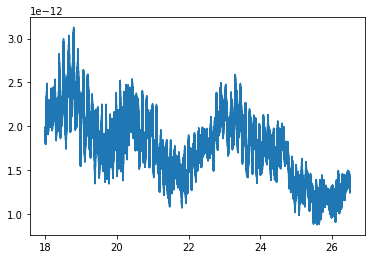

In [2]:
path = f"/data/ms2840a/result_data/signal_raw_data.csv"
data = func.csv_to_array(path)
plt.plot(data["freq"], data["W"])

In [3]:
print(len(data["W"]))

111413750


In [5]:
y = func.csv_to_array("/data/ms2840a/result_data/yfactor_result_rebin2MHz.csv")
print(len(y["Gain"]))

4250


In [6]:
freq, W, Werr = func.any_rebin_func(data["freq"], data["W"], 0.002)

In [34]:
Tsys = W/y["Gain"][:-1]/1.380649e-23/300

rebin = 50
nbin = (int)(freq.size/rebin)
def average(x):
    x_ave = x[:nbin*rebin]
    x_ave = x_ave.reshape(nbin, rebin)
    return np.average(x_ave, axis=1)

freq_ave = average(freq)
Tsys_ave = average(Tsys)
Trx_ave = average(y['Trx'])
Tload_ave = Tsys_ave - Trx_ave
gain_ave = average(y['Gain'])

yticks =  np.arange(0,450,50)
print(yticks)

[  0  50 100 150 200 250 300 350 400]


([<matplotlib.axis.YTick at 0x7fae4dff2f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

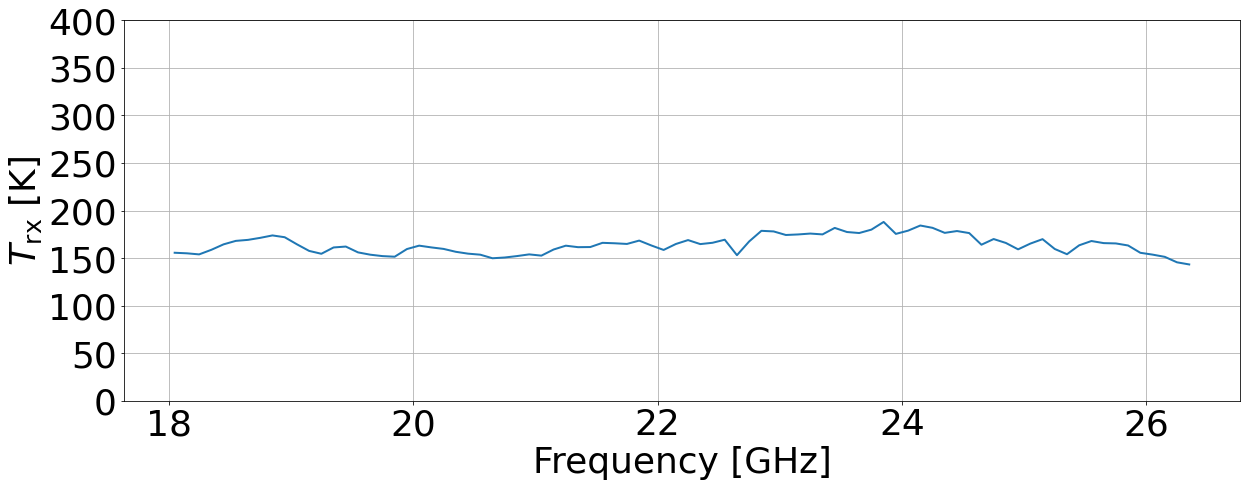

In [43]:
plt.rcParams["font.size"] = 36 
fig = plt.figure(figsize=(20,7))
plt.plot(freq_ave, Trx_ave, lw=2)
plt.grid()
plt.xlabel("Frequency [GHz]")
plt.ylabel(r"$T_\mathrm{rx}$ [K]")
plt.ylim([0,300])
plt.yticks(yticks)
#plt.savefig("../result_figure/Trx.pdf")

([<matplotlib.axis.YTick at 0x7fae4db5b580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

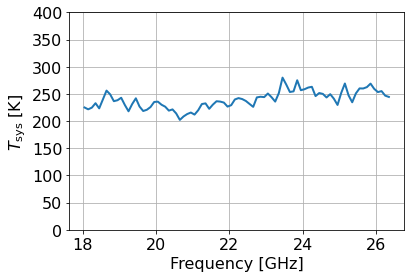

In [40]:
plt.rcParams["font.size"] = 16 
fig = plt.figure(figsize=(6,4))
plt.plot(freq_ave, Tsys_ave, lw=2)
plt.grid()
plt.xlabel("Frequency [GHz]")
plt.ylabel(r"$T_\mathrm{sys}$ [K]")
plt.ylim([0,400])
plt.yticks(yticks)
#plt.savefig("../result_figure/Tsys.pdf")

([<matplotlib.axis.YTick at 0x7fae4de08640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

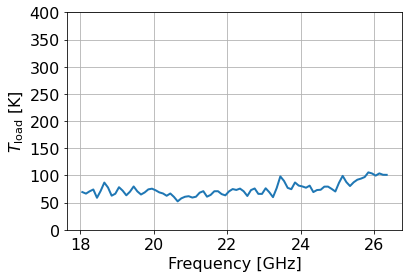

In [41]:
plt.rcParams["font.size"] = 16 
fig = plt.figure(figsize=(6,4))
plt.plot(freq_ave, Tload_ave, )
plt.grid()
plt.xlabel("Frequency [GHz]")
plt.ylabel(r"$T_\mathrm{load}$ [K]")
plt.ylim([0,400])
plt.yticks(yticks)
#plt.savefig("../result_figure/Tload.pdf")